## Reading Data


In [5]:
import pandas as pd
import numpy as np

In [28]:
train = pd.read_csv('./data/train.csv')

In [29]:
#train

In [30]:
test = pd.read_csv('./data/test.csv')

In [31]:
#test

## Analysis

### The training data contains a row per comment, with an id, the text of the comment, and 6 different labels that we'll try to predict.

## Looking at the data



In [32]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Here's a couple of examples of comments, one toxic, and one with no labels.

In [33]:
train['comment_text'][5]

'"\n\nCongratulations from me as well, use the tools well. \xc2\xa0\xc2\xb7 talk "'

In [34]:
train['comment_text'][2]

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

The length of the comments varies a lot.

In [41]:
lens = train.comment_text.str.len()
#print(lens)
lens.mean(), lens.std(), lens.max()

(394.7120842759649, 591.9907293798376, 5895)

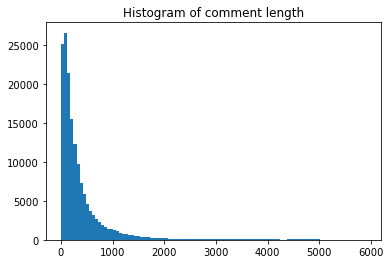

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(lens, bins=100) 
plt.title("Histogram of comment length")
plt.show()

We'll create a list of all the labels to predict, and we'll also create a 'none' label so we can see how many comments have no labels. We can then summarize the dataset.

#### Now lets analyse statistics of the overall dataset

In [37]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train['none'] = 1-train[label_cols].max(axis=1)

#train["severe_toxic"]= None
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.898321
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.302226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
len(train),len(test)


(153164, 2)

There are a few empty comments that we need to get rid of, otherwise sklearn will complain.

In [46]:
COMMENT = 'comment_text'
#print(train.isnull())
train[COMMENT].fillna("unknown", inplace=True)
test[COMMENT].fillna("unknown", inplace=True)
train_text=train[COMMENT]
test_text = test[COMMENT]

all_text = pd.concat([train_text, test_text]) # for feature extraction

## Analysis

####  *This is where we will spend some time  (say 3 to 4 days max) and design features. As such I will leave this to you. We will add as and when we decide on features*

## Feature Selection/ Feature Engg

We'll start by creating a simple model using two simple features which you already studied, one of them is *Count vectors (0,1 thingy which u built for assignments)* and other one is *TFIDF - which u asked me sometime back*.


Also we will use an ifelse case to test with alternate features

0 ; TFIDF
1 ; Binary word counts

### TFIDF Feature

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import GaussianNB
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

flag=1

## Word Count feature

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
binary_vectorizer = CountVectorizer(
    strip_accents='unicode',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)


word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)



## If else case for selecting alternate features

In [51]:
if flag==0:
    print("Using TFIDF features")
    word_vectorizer.fit(all_text)
    
    train_word_features = word_vectorizer.transform(train_text)
    test_word_features = word_vectorizer.transform(test_text)

    train_features=train_word_features
    test_features=test_word_features
elif flag ==1:
    print("Using word count features")
    binary_vectorizer.fit(all_text)
    train_word_features = binary_vectorizer.transform(train_text)
    test_word_features = binary_vectorizer.transform(test_text)

    train_features=train_word_features
    test_features=test_word_features

Using word count features


In [65]:
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
scores = []
submission = pd.DataFrame.from_dict({'id': test['id']})

In [67]:
print(train_features)

  (0, 244)	1
  (0, 303)	1
  (0, 319)	1
  (0, 393)	1
  (0, 1967)	1
  (0, 3012)	1
  (0, 3168)	1
  (0, 3481)	1
  (0, 3522)	1
  (0, 3578)	1
  (0, 3965)	1
  (0, 4256)	1
  (0, 5059)	1
  (0, 5742)	1
  (0, 6091)	1
  (0, 6467)	1
  (0, 7516)	1
  (0, 7646)	1
  (0, 7669)	1
  (0, 8825)	1
  (0, 8893)	1
  (0, 9422)	1
  (0, 9604)	1
  (0, 9716)	1
  (0, 9908)	1
  :	:
  (159568, 8970)	1
  (159568, 9268)	1
  (159569, 516)	1
  (159569, 2683)	1
  (159569, 5347)	1
  (159569, 5441)	1
  (159569, 5444)	1
  (159569, 8422)	1
  (159569, 9519)	1
  (159570, 1091)	2
  (159570, 1127)	2
  (159570, 1610)	1
  (159570, 2094)	1
  (159570, 3012)	1
  (159570, 4076)	1
  (159570, 4340)	1
  (159570, 4542)	1
  (159570, 4546)	1
  (159570, 4782)	1
  (159570, 5122)	1
  (159570, 7337)	1
  (159570, 7695)	1
  (159570, 7721)	1
  (159570, 8977)	1
  (159570, 9297)	1


### Model building

#### Please see for list of all classifiers you can play with here @ http://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble , http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree and http://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm

In [71]:
for class_name in class_names:
    #print(class_name)
    train_target = train[class_name]
    #print(train_target)
    ########## Below line is where you will play with the algorithms, currently I have used logistic regression########
    classifier = LogisticRegression()
    #classifier = KNeighborsClassifier()
    #classifier = SVC()
    #classifier = DecisionTreeClassifier()
    #classifier = MLPClassifier()
    ##################################################################################################################
    #cv_score = np.mean(cross_val_score(classifier, train_features, train_target, cv=3, scoring='roc_auc'))
    #scores.append(cv_score)
    #print('CV score for class {} is {}'.format(class_name, cv_score))
    classifier.fit(train_features[:50000], train_target[:50000])
    res=classifier.predict(test_features)
    print(len(res))
    print(res)
    
    #submission[class_name] = classifier.predict_proba(test_features)[:, 1]

#print('Total CV score is {}'.format(np.mean(scores)))

153164
[1 0 0 ..., 0 0 1]
153164
[0 0 0 ..., 0 0 0]
153164
[1 0 0 ..., 0 0 0]
153164
[0 0 0 ..., 0 0 0]
153164
[1 0 0 ..., 0 0 0]
153164
[0 0 0 ..., 0 0 0]


## Save the result in csv for evaluation in Kaggle

In [ ]:
submission.to_csv('submission.csv', index=False)